In [1]:
import numpy as np
import pandas as pd
import glob # to import all files at once
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import matplotlib.gridspec as gridspec
from datetime import datetime
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
# import bokeh library 

from bokeh.io import show, output_file, curdoc
from bokeh.plotting import figure
from bokeh.palettes import Plasma
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource, FactorRange, HoverTool, RadioButtonGroup, PreText 
from bokeh.models.widgets import Select, Panel, Tabs
from bokeh.layouts import column, row

# Load Private property data

In [3]:
path_property = r'ARP\Rightmove_Data_20200411\1_PrivateProperty' # use your path for 1st private property file
path_property1 = r'ARP\Rightmove_Data_20200417\1_PrivateProperty' # use your path for 2nd PP file
path_property2 = r'ARP\Rightmove_Data_20200424\1_PrivateProperty' # use your path for 3rd file

property = glob.glob(path_property + "/*.xlsx")
property1 = glob.glob(path_property1 + "/*.xlsx")
property2 = glob.glob(path_property2 + "/*.xlsx")

li = []

for filename in property:
    a = pd.read_excel(filename, index_col=None, header=0)
    a['scrapping_week'] = 1
    li.append(a)
    
for filename in property1:
    a = pd.read_excel(filename, index_col=None, header=0)
    a['scrapping_week'] = 2
    li.append(a)

for filename in property2:
    a = pd.read_excel(filename, index_col=None, header=0)
    a['scrapping_week'] = 3
    li.append(a)

df_property = pd.concat(li, axis=0, ignore_index=True)
df_property = df_property.sort_values(['scrapping_week', 'property_addedtime']).drop_duplicates(['property_address','property_addedtime','property_description','property_price'], keep='first')

df_property.head()


,property_addedtime,property_address,property_balcony,property_bedroom,property_description,property_garden,property_parking,property_penthouse,property_postcode,property_price,property_tenure,property_tube,property_tubedist,scrapping_week
6164,01 April 2019,"Bruce House, Harrow, London, HA1 2FW",False,1,1 bedroom apartment for sale,False,False,False,HA1 2FW,75500,Leasehold,Harrow-on-the-Hill,(0.5 mi),1
11785,01 April 2019,"Coniston Gardens, London",False,2,2 bedroom detached house for sale,False,True,False,N9 8NB,314950,Freehold,Edmonton Green,(0.7 mi),1
11873,01 April 2019,"Old Park View, Enfield",False,4,4 bedroom detached house for sale,True,True,False,EN2 7EH,1150000,NaN,Enfield Chase,(0.3 mi),1
20840,01 April 2019,"Ellesmere Close, Wanstead",False,7,7 bedroom semi-detached house for sale,True,True,False,E11 1PT,1250000,Freehold,Snaresbrook,(0.2 mi),1
27899,01 April 2019,"Mitcham Lane, Streatham",False,2,2 bedroom flat for sale,True,False,False,SW16 6LW,375000,Leasehold,Streatham,(0.2 mi),1


In [4]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31986 entries, 6164 to 92867
Data columns (total 14 columns):
property_addedtime      31747 non-null object
property_address        31986 non-null object
property_balcony        31986 non-null object
property_bedroom        31986 non-null object
property_description    31986 non-null object
property_garden         31986 non-null object
property_parking        31986 non-null object
property_penthouse      31986 non-null object
property_postcode       31986 non-null object
property_price          31986 non-null object
property_tenure         24667 non-null object
property_tube           31978 non-null object
property_tubedist       31978 non-null object
scrapping_week          31986 non-null int64
dtypes: int64(1), object(13)
memory usage: 3.7+ MB


# Load Commertial Property Data

In [5]:
path_commercial = r'ARP\Rightmove_Data_20200411\2_CommericalProperty' # use your path for 1st private commercial file
path_commercial1 = r'ARP\Rightmove_Data_20200417\2_CommercialProperty' # use your path for 2nd PP file
path_commercial2 = r'ARP\Rightmove_Data_20200424\2_CommercialProperty' # use your path for 3rd file

commercial = glob.glob(path_commercial + "/*.xlsx")
commercial1 = glob.glob(path_commercial1 + "/*.xlsx")
commercial2 = glob.glob(path_commercial2 + "/*.xlsx")

co = []

for filename in commercial:
    a = pd.read_excel(filename, index_col=None, header=0)
    co.append(a)
    
for filename in commercial1:
    a = pd.read_excel(filename, index_col=None, header=0)
    co.append(a)

for filename in commercial2:
    a = pd.read_excel(filename, index_col=None, header=0)
    co.append(a)

df_commercial = pd.concat(co, axis=0, ignore_index=True)
df_commercial = df_commercial.sort_values(['search_date']).drop_duplicates(['address','type','price'], keep='first')

df_commercial.head()

,Unnamed: 0,price,type,address,url,agent_url,postcode,number_bedrooms,search_date
1517,498,900000.0,Commercial property for sale,"Sandhurst Road, Catford, SE6",http://www.rightmove.co.uk/commercial-property...,NaN,SE6,NaN,2020-04-11 16:00:27.191242
1273,254,120000.0,Restaurant for sale,"London, London - Central",http://www.rightmove.co.uk/commercial-property...,http://www.rightmove.co.uk/estate-agents/agent...,NaN,NaN,2020-04-11 16:00:27.191242
1272,253,NaN,Restaurant for sale,"Green Lanes, London, N21",http://www.rightmove.co.uk/commercial-property...,http://www.rightmove.co.uk/estate-agents/agent...,N21,NaN,2020-04-11 16:00:27.191242
1271,252,125000.0,Hairdresser / barber shop for sale,"London, SW6",http://www.rightmove.co.uk/commercial-property...,http://www.rightmove.co.uk/estate-agents/agent...,SW6,NaN,2020-04-11 16:00:27.191242
1270,251,NaN,Restaurant for sale,"Cocktail Bar and Jazz Venue, Clapham, London, ...",http://www.rightmove.co.uk/commercial-property...,http://www.rightmove.co.uk/estate-agents/agent...,SW11,NaN,2020-04-11 16:00:27.191242


In [6]:
df_commercial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1226 entries, 1517 to 5318
Data columns (total 9 columns):
Unnamed: 0         1226 non-null int64
price              1051 non-null float64
type               1226 non-null object
address            1226 non-null object
url                1226 non-null object
agent_url          734 non-null object
postcode           849 non-null object
number_bedrooms    80 non-null float64
search_date        1226 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 95.8+ KB


# Data Cleaning And Preparation

In [7]:
df_private=df_property

In [8]:
df_private.rename(columns={'property_description':'Description','property_addedtime':'Added_time','property_address':'Address','property_balcony':'Balcony',
                           'property_bedroom':'Bedrooms','property_garden':'Garden','property_parking':'Parking',
                          'property_penthouse':'Penthouse','property_postcode':'Postcode','property_price':'Price',
                          'property_tenure':'Tenure', 'property_tube':'Tube','property_tubedist':'Tubedist'},inplace=True)

#Drop rows with missing price as price is the most important information
df_private.dropna(subset=['Price'])
df_commercial.dropna(subset=['price'])

#Fill NaNs with NA in all remainding columns
df_private.fillna('NA', inplace = True)
df_commercial.fillna('NA', inplace = True)

## choose only address, as headings from 99 files were also merge into df
df_private = df_private[df_private['Postcode'] != 'Postcode']

In [9]:
#Groupby to get a better understanding of the collected data
df_private_summary = df_private
df_private_summary.loc[:, "weight"] = 1
df_bedroom_summary = pd.DataFrame(df_private_summary.groupby(by=['Bedrooms'], as_index=False)['weight'].aggregate(np.sum))
df_tenure_summary = pd.DataFrame(df_private_summary.groupby(by=['Tenure'], as_index=False)['weight'].aggregate(np.sum))

In [64]:
df_type_summary = pd.DataFrame(df_private_summary.groupby(by=['Type'], as_index=False)['weight'].aggregate(np.sum))

KeyError: 'Type'

In [10]:
df_bedroom_summary

,Bedrooms,weight
0,1,6302
1,2,11508
2,3,7625
3,4,3552
4,5,1573
5,6,444
6,7,115
7,8,47
8,9,14
9,B,3


In [11]:
df_private.loc[((df_private['Penthouse'] == 'False')), 'Penthouse'] = False
df_private.loc[((df_private['Penthouse'] == 'True')), 'Penthouse'] = True
df_private.loc[((df_private['Balcony'] == 'False')), 'Balcony'] = False
df_private.loc[((df_private['Balcony'] == 'True')), 'Balcony'] = True
df_private.loc[((df_private['Garden'] == 'False')), 'Garden'] = False
df_private.loc[((df_private['Garden'] == 'True')), 'Garden'] = True
df_private.loc[((df_private['Parking'] == 'False')), 'Parking'] = False
df_private.loc[((df_private['Parking'] == 'True')), 'Parking'] = True

df_private['Bedrooms']= pd.to_numeric(df_private['Bedrooms'], errors = 'coerce') #I chose to remove 806 non-numerical entries
df_private['Price']= pd.to_numeric(df_private['Price'], errors = 'coerce')
df_private['Address'].astype(str)
df_private['Postcode'].astype(str)
df_private['Description'].astype(str)
df_private['Tenure'].astype(str)
df_private['Penthouse'].astype(bool)
df_private['Parking'].astype(bool)
df_private['Garden'].astype(bool)
df_private['Balcony'].astype(bool)
df_private['Tube'].astype(str)
df_private['Tubedist'].astype(str)

df_commercial['price']= pd.to_numeric(df_commercial['price'], errors = 'coerce')

In [12]:
# search for true meaning of these property_description/property_type

# 'apartment' is a suite of rooms forming one residence, typically in a building containing a number of these.
# 'block of apartments' is a bulding with a suite of rooms forming one residence.
# 'chalet' is a wooden house or cottage with overhanging eaves.
# 'cottage' is a small house. It may carry the connotation of being an old or old-fashioned building.
# 'detached house' is a stand-alone house is a free-standing residential building. 
# 'duplex' is an apartments that is situated on two floor.
# 'equestrian facility' is created and maintained for the purpose of accommodating, training or competing equids, especially horses.
# 'flat' is an apartment comes from the Old English word flett, which means floor, a dwelling.
# 'house' is a building for human habitation, especially one that is lived in by a family or small group of people.
# 'house' boat is a boat that has been designed or modified to be used primarily as a home.
# 'mews house' is a British name for a row or courtyard of stables and carriage houses with living quarters above them, built behind large city houses before motor vehicles replaced horses
# 'off-plan' is a property that hasn't yet been built
# 'penthouse' is an apartment on the highest floor of an apartment building, condominium, or hotel. Penthouses are typically differentiated from other apartments by luxury features.
# 'property' is a thing or things belonging to someone; possessions collectively.
# 'retirement' home is a multi-residence housing facility intended for the elderly.
# 'semi-detached' house is a single family duplex dwelling house that shares one common wall with the next house
# 'terraced house' is a form of housing whereby a row of attached dwellings share side walls.
# 'town house' is a type of terraced housing.

In [13]:
### based on the definition above, some of these properties are referring to the same type of property
# but use different terms. Therefore, we can first rename these properties under the same name.

# clean data to make value within the field an attribute data
df_private['Description'] = df_private['Description'].str.replace("bedroom","")
df_private['Description'] = df_private['Description'].str.replace("for sale","")
df_private['Description'] = df_private['Description'].str.replace("ground","")
df_private['Description'] = df_private['Description'].str.replace("floor","")
df_private['Description'] = df_private['Description'].str.replace("end of","")
#df_private['property_description'] = df_private['property_description'].str.replace("block of","") 
df_private['Description'] = df_private['Description'].str.replace("character","")
df_private['Description'] = df_private['Description'].str.replace("share","")
df_private['Description'] = df_private['Description'].str.replace("link","")
df_private['Description'] = df_private['Description'].str.replace("sheltered housing",
                                                                  "retirement home")
df_private['Description'] = df_private['Description'].str.replace("retirement property",
                                                                  "retirement home")

# weird naming, detached bungalow should be detached house
df_private['Description'] = df_private['Description'].str.replace("bungalow","house")
df_private['Description'] = df_private['Description'].str.replace("terrace house","terraced house")

# maisonette is flat on two-floor. So it should be classed as duplex
df_private['Description'] = df_private['Description'].str.replace("maisonette","duplex") 

# duplex should be duplex apartment
df_private['Description'] = df_private['Description'].str.replace("duplex","duplex apartment")

# town house should be classed as terraced house 
df_private['property_description'] = df_private['Description'].str.replace("town","terraced")

# equestrian facility should be classed as a mews house 
df_private['Description'] = df_private['Description'].str.replace("equestrian facility","mews house")

# remove number of rooms since there is a column/attribute for that already
df_private['Description'] = df_private['Description'].str.replace("0","")
df_private['Description'] = df_private['Description'].str.replace("1","")
df_private['Description'] = df_private['Description'].str.replace("2","")
df_private['Description'] = df_private['Description'].str.replace("3","")
df_private['Description'] = df_private['Description'].str.replace("4","")
df_private['Description'] = df_private['Description'].str.replace("5","")
df_private['Description'] = df_private['Description'].str.replace("6","")
df_private['Description'] = df_private['Description'].str.replace("7","")
df_private['Description'] = df_private['Description'].str.replace("8","")
df_private['Description'] = df_private['Description'].str.replace("9","")

In [14]:
df_private = df_private[df_private['Description'] != '24 bedroom block of apartments for sale']
df_private = df_private[df_private['Description'] != '60 bedroom property for sale']
df_private = df_private[df_private['Description'] != '60 bedroom terraced house for sale'] 
df_private = df_private[df_private['Description'] != '92 bedroom flat for sale']

# df_private['property_description'] = df_private['property_description'].str.replace(" ","") #remove every space
# replace space in front and back with ""
df_private['Description'] = df_private['Description'].str.strip()

In [15]:
### remove all unwanted property type, to enhance the accuracy of pricing analysis

# property because we dont know which property it is 
df_private = df_private[df_private['Description'] != 'property']

# off-plan
df_private = df_private[df_private['Description'] != 'off-plan']

# house boat
df_private = df_private[df_private['Description'] != 'house boat']

# most likely to be use for commercial
df_private = df_private[df_private['Description'] != 'block of apartments']

In [16]:
df_private.loc[:,'property_type'] = df_private['Description']
df_private.drop(['Description'], axis=1, inplace=True)

In [17]:
# create another column for property group 
# where properties will be categorised into 3 group. One is Flat/Apartment, two is House and three is Other

# group two = House
df_private.loc[:,'property_group'] = 'House'

# group one = Flat/Apartment
df_private.loc[((df_private['property_type'] == 'flat')), 'property_group'] = 'Flat/Apartment'
df_private.loc[((df_private['property_type'] == 'apartment')), 'property_group'] = 'Flat/Apartment'
df_private.loc[((df_private['property_type'] == 'duplex apartment')), 'property_group'] = 'Flat/Apartment'
df_private.loc[((df_private['property_type'] == 'penthouse')), 'property_group'] = 'Flat/Apartment'

In [18]:
#Tenure entries need to be modified for better grouping
df_tenure_summary

,Tenure,weight
0,Commonhold,6
1,Freehold,9220
2,Leasehold,11724
3,"Leasehold, 1 years remaining",2
4,"Leasehold, 10 years remaining",1
5,"Leasehold, 100 years remaining",45
6,"Leasehold, 1000 years remaining",4
7,"Leasehold, 101 years remaining",5
8,"Leasehold, 102 years remaining",9
9,"Leasehold, 103 years remaining",11


In [19]:
### fix property_tenure column to make value an attribute data 

# change any value that is not 'Commonhold' or 'Freehold' or 'Share of Freehold' or 'NA' (Get rid later)
# also further/seperate EDA can be done on years remaining in relation to price of property 
# using every leasehold property record that have value of years remaining
#df_private.loc[((df_private['property_tenure'] == 'Leasehold')), 'property_tenure'] = 'Leasehold'

In [20]:
### create another column to store the value of years remaining 

df_private.loc[:,'years_remaining'] = df_private['Tenure']

### clean property_tenure

# remove years remaining since there is a column/attribute for that already 

df_private['Tenure'] = df_private['Tenure'].str.replace("Leasehold,","Leasehold")
df_private['Tenure'] = df_private['Tenure'].str.replace("years remaining","")

df_private['Tenure'] = df_private['Tenure'].str.replace("0","")
df_private['Tenure'] = df_private['Tenure'].str.replace("1","")
df_private['Tenure'] = df_private['Tenure'].str.replace("2","")
df_private['Tenure'] = df_private['Tenure'].str.replace("3","")
df_private['Tenure'] = df_private['Tenure'].str.replace("4","")
df_private['Tenure'] = df_private['Tenure'].str.replace("5","")
df_private['Tenure'] = df_private['Tenure'].str.replace("6","")
df_private['Tenure'] = df_private['Tenure'].str.replace("7","")
df_private['Tenure'] = df_private['Tenure'].str.replace("8","")
df_private['Tenure'] = df_private['Tenure'].str.replace("9","")



### clean years_remaining

# remove type of property_tenure since there is a column/attribute for that already
df_private['years_remaining'] = df_private['years_remaining'].str.replace("Commonhold","")
df_private['years_remaining'] = df_private['years_remaining'].str.replace("Share of Freehold","")
df_private['years_remaining'] = df_private['years_remaining'].str.replace("Freehold","")
df_private['years_remaining'] = df_private['years_remaining'].str.replace("Leasehold","")
df_private['years_remaining'] = df_private['years_remaining'].str.replace(",","")

In [21]:
#df_private['Tenure'] = df_private['property_tenure'].str.replace(" ","")
df_private['Tenure'] = df_private['Tenure'].str.strip()

In [22]:
df_private['years_remaining'] = df_private['years_remaining'].str.strip()

In [23]:
# change NULL/Empty record to NA, NA for Not Available
df_private.loc[((df_private['years_remaining'] == '')), 'years_remaining'] = 'NA'

In [24]:
## check to see if value of property tenure is absolute
set(df_private['Tenure'])

{'Commonhold',
 'Freehold',
 'Leasehold',
 'NA',
 'Share of Freehold',
 'property_tenure'}

In [25]:
df_private = df_private[df_private['Tenure'] != 'property_tenure']

In [26]:
## check again to see if value of property tenure is absolute
set(df_private['Tenure'])

{'Commonhold', 'Freehold', 'Leasehold', 'NA', 'Share of Freehold'}

In [27]:
df_private.reset_index(inplace = True)

In [28]:
df_private.drop(columns='index',inplace=True)

In [29]:
### refine the Postcode to make it compatible with the supplementary data (London Postcode Ref)

areacode = []

for i in range (0, len(df_private)):
    s = df_private['Postcode'][i].split(" ")[0]
    areacode.append(s)
    
df_private['Areacode'] = areacode


In [30]:
# regroup attributes within the dataframe df_private
df_private = df_private.groupby(['Address', 'Areacode', 'Postcode', 'Bedrooms', 'property_group', 'property_type', 
                                 'Tenure', 'years_remaining', 'Penthouse', 'Parking', 'Garden',
                                 'Balcony','Price', 'Tube', 'Tubedist'])['weight'].agg(np.sum).reset_index()

In [31]:
df_commercial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1226 entries, 1517 to 5318
Data columns (total 9 columns):
Unnamed: 0         1226 non-null int64
price              1051 non-null float64
type               1226 non-null object
address            1226 non-null object
url                1226 non-null object
agent_url          1226 non-null object
postcode           1226 non-null object
number_bedrooms    1226 non-null object
search_date        1226 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 95.8+ KB


In [32]:
#Amend property price to show thousands of £ for easier readibility
df_private['Price']=df_private['Price']/1000
df_commercial['price']=df_commercial['price']/1000

In [33]:
#Drop column so that it doesn't create unnecessary plots
df_private = df_private.drop(columns='weight', axis=1)

In [34]:
#Create separate datasets for properties based on number of bedrooms and drop bedroom column from them
df_private_1bed = df_private[df_private.Bedrooms == 1]
df_private_1bed.drop(columns='Bedrooms', axis=1, inplace=True)
df_private_2bed = df_private[df_private.Bedrooms == 2]
df_private_2bed.drop(columns='Bedrooms', axis=1, inplace=True)
df_private_3bed = df_private[df_private.Bedrooms == 3]
df_private_3bed.drop(columns='Bedrooms', axis=1, inplace=True)
df_private_4bed = df_private[df_private.Bedrooms == 4]
df_private_4bed.drop(columns='Bedrooms', axis=1, inplace=True)
df_private_5bed = df_private[df_private.Bedrooms == 5]
df_private_5bed.drop(columns='Bedrooms', axis=1, inplace=True)
df_private_6bed = df_private[df_private.Bedrooms == 6]
df_private_6bed.drop(columns='Bedrooms', axis=1, inplace=True)
df_private_7bed = df_private[df_private.Bedrooms == 7]
df_private_7bed.drop(columns='Bedrooms', axis=1, inplace=True)
df_private_8bed = df_private[df_private.Bedrooms == 8]
df_private_8bed.drop(columns='Bedrooms', axis=1, inplace=True)
df_private_9bed = df_private[df_private.Bedrooms == 9]
df_private_9bed.drop(columns='Bedrooms', axis=1, inplace=True)

C:\Users\Tunky\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [35]:
df_private_1bed

,Address,Areacode,Postcode,property_group,property_type,Tenure,years_remaining,Penthouse,Parking,Garden,Balcony,Price,Tube,Tubedist
3,"#8540, Fladgate House, 4 Circus Road West, Bat...",SW11,SW11 8EU,Flat/Apartment,apartment,NA,NA,False,True,True,False,850.000,Battersea Park,(0.3 mi)
5,",",HA5,HA5 3RU,House,retirement home,Leasehold,NA,False,True,True,False,205.000,Pinner,(0.7 mi)
8,"1 Bed Apartment - Plot 424 at Eclipse, Blackh...",E17,E17 6HJ,Flat/Apartment,apartment,NA,NA,False,False,False,True,371.000,Blackhorse Road,(0.1 mi)
9,1 BEDROOM FLAT IN NEED OF MODERNISING CLOSE TO...,HA9,HA9 9SU,Flat/Apartment,flat,Leasehold,NA,False,True,True,False,230.000,Preston Road,(0.5 mi)
10,"1 Bedroom Apartment - Plot 60 at Aspext, Wick ...",E3,E3 2LX,Flat/Apartment,apartment,NA,NA,False,False,False,False,415.000,Hackney Wick,(0.2 mi)
11,"1 Bedroom Apartment at Colindale Gardens, Coli...",NW9,NW9 5HU,Flat/Apartment,apartment,NA,NA,False,False,False,False,364.000,Colindale,(0.0 mi)
12,"1 Bedroom Apartment at Colindale Gardens, Coli...",NW9,NW9 5HU,Flat/Apartment,apartment,NA,NA,False,False,True,False,398.000,Colindale,(0.0 mi)
13,"1 Bedroom Apartment at Colindale Gardens, Coli...",NW9,NW9 5HU,Flat/Apartment,flat,NA,NA,False,False,True,False,415.000,Colindale,(0.0 mi)
14,"1 Bedroom Apartment at One Thames City, Wandsw...",SW8,SW8 2LX,Flat/Apartment,apartment,Leasehold,999 years remaining,False,False,False,False,1163.000,Vauxhall,(0.2 mi)
15,1 Bedroom Flat FOR SALE! Hendon,NW4,NW4 1PT,Flat/Apartment,flat,Leasehold,NA,False,False,False,False,189.950,Colindale,(0.8 mi)


In [36]:
#Delete unwanted generated column
df_commercial.drop(columns='Unnamed: 0',inplace=True)

# Data Visualisation

## Private Properties

In [37]:
#Statistical analysis
df_private.describe()

,Bedrooms,Price
count,30592.000000,30592.000000
mean,2.507126,735.075623
std,1.216308,970.970923
min,1.000000,40.000000
25%,2.000000,370.000000
50%,2.000000,510.000000
75%,3.000000,750.000000
max,9.000000,25000.000000


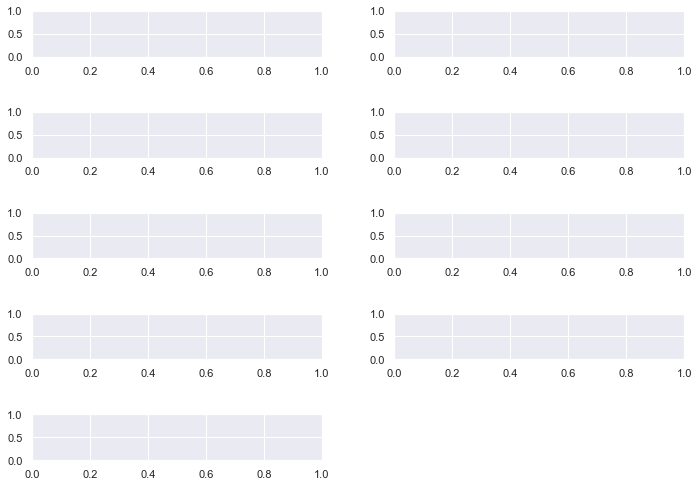

In [38]:
fig = plt.figure(figsize=(11.69,8.27)) #figure size in inches to fit A4

# parition the figure into 4 subplots with 'gridspec'
gs = gridspec.GridSpec(5, 2, # we want 2 rows, 2 cols
                       figure=fig, # this gs applies to figure
                       hspace=1.2, 
                       wspace=0.25, # separation between plots
                       width_ratios=[1, 1], # ration between the first and second column
                       height_ratios=[1, 1, 1, 1,1]) #ration between the first ans second row

# add plots
ax0 = fig.add_subplot(gs[0, 0]) # this will occupy the first row-first column
ax1 = fig.add_subplot(gs[0, 1]) # and so on and so forth...
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0]) 
ax5 = fig.add_subplot(gs[2, 1]) 
ax6 = fig.add_subplot(gs[3, 0])
ax7 = fig.add_subplot(gs[3, 1])
ax8 = fig.add_subplot(gs[4, 0])

In [39]:
sns.boxplot(x=df_private_1bed['Price'], ax=ax0)
ax0.set_xlabel(xlabel="Price (£ '000s)")
ax0.set_title(label="1 bedroom")

sns.boxplot(x=df_private_2bed['Price'], ax=ax1)
ax1.set_xlabel(xlabel="Price (£ '000s)")
ax1.set_title(label="2 bedrooms")

sns.boxplot(x=df_private_3bed['Price'], ax=ax2)
ax2.set_xlabel(xlabel="Price (£ '000s)")
ax2.set_title(label="3 bedrooms")

sns.boxplot(x=df_private_4bed['Price'], ax=ax3)
ax3.set_xlabel(xlabel="Price (£ '000s)")
ax3.set_title(label="4 bedrooms")

sns.boxplot(x=df_private_5bed['Price'], ax=ax4)
ax4.set_xlabel(xlabel="Price (£ '000s)")
ax4.set_title(label="5 bedrooms")

sns.boxplot(x=df_private_6bed['Price'], ax=ax5)
ax5.set_xlabel(xlabel="Price (£ '000s)")
ax5.set_title(label="6 bedrooms")

sns.boxplot(x=df_private_7bed['Price'], ax=ax6)
ax6.set_xlabel(xlabel="Price (£ '000s)")
ax6.set_title(label="7 bedrooms")

sns.boxplot(x=df_private_8bed['Price'], ax=ax7)
ax7.set_xlabel(xlabel="Price (£ '000s)")
ax7.set_title(label="8 bedrooms")

sns.boxplot(x=df_private_9bed['Price'], ax=ax8)
ax8.set_xlabel(xlabel="Price (£ '000s)")
ax8.set_title(label="9 bedrooms")

Text(0.5, 1, '9 bedrooms')

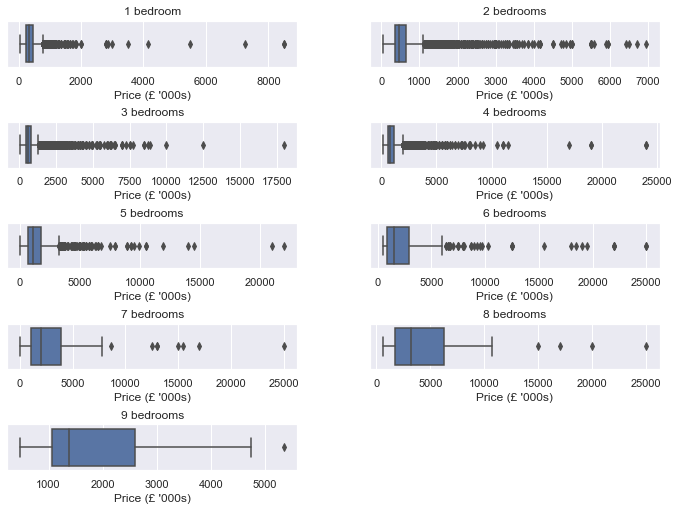

In [40]:
fig

In [41]:
df_private_1bed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 3 to 30591
Data columns (total 14 columns):
Address            6172 non-null object
Areacode           6172 non-null object
Postcode           6172 non-null object
property_group     6172 non-null object
property_type      6172 non-null object
Tenure             6172 non-null object
years_remaining    6172 non-null object
Penthouse          6172 non-null bool
Parking            6172 non-null bool
Garden             6172 non-null bool
Balcony            6172 non-null bool
Price              6172 non-null float64
Tube               6172 non-null object
Tubedist           6172 non-null object
dtypes: bool(4), float64(1), object(9)
memory usage: 554.5+ KB


In [42]:
df_analysis = pd.DataFrame(df_private.groupby(by=['Bedrooms','property_group','Tenure'],as_index=False)['Price'].aggregate(np.mean))
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 4 columns):
Bedrooms          62 non-null float64
property_group    62 non-null object
Tenure            62 non-null object
Price             62 non-null float64
dtypes: float64(2), object(2)
memory usage: 2.4+ KB


In [62]:
df_count = pd.DataFrame(df_private.groupby(by=['property_type'],as_index=False).count())
df_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 15 columns):
property_type      14 non-null object
Address            14 non-null int64
Areacode           14 non-null int64
Postcode           14 non-null int64
Bedrooms           14 non-null int64
property_group     14 non-null int64
Tenure             14 non-null int64
years_remaining    14 non-null int64
Penthouse          14 non-null int64
Parking            14 non-null int64
Garden             14 non-null int64
Balcony            14 non-null int64
Price              14 non-null int64
Tube               14 non-null int64
Tubedist           14 non-null int64
dtypes: int64(14), object(1)
memory usage: 1.8+ KB


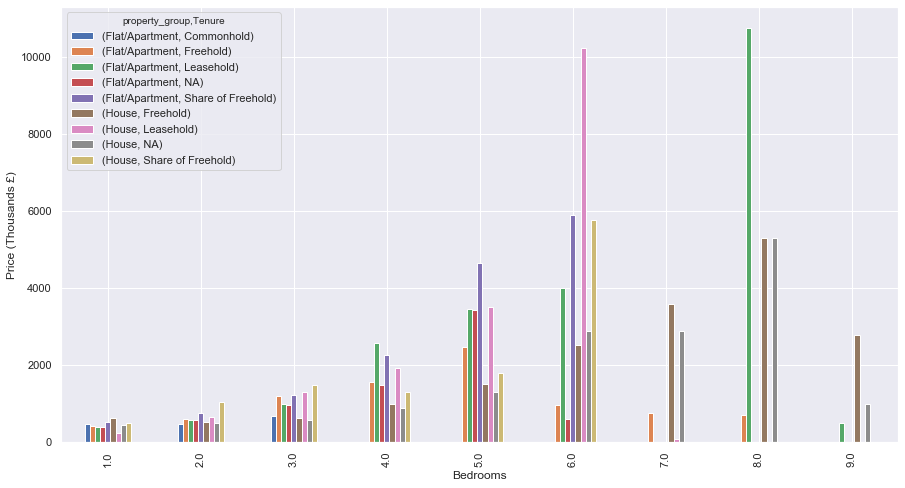

In [43]:
pd.pivot_table(df_analysis, index = ['Bedrooms'], columns=['property_group','Tenure'], values="Price").plot(figsize=(15,8), kind='bar')
plt.ylabel('Price (Thousands £)')
plt.show()

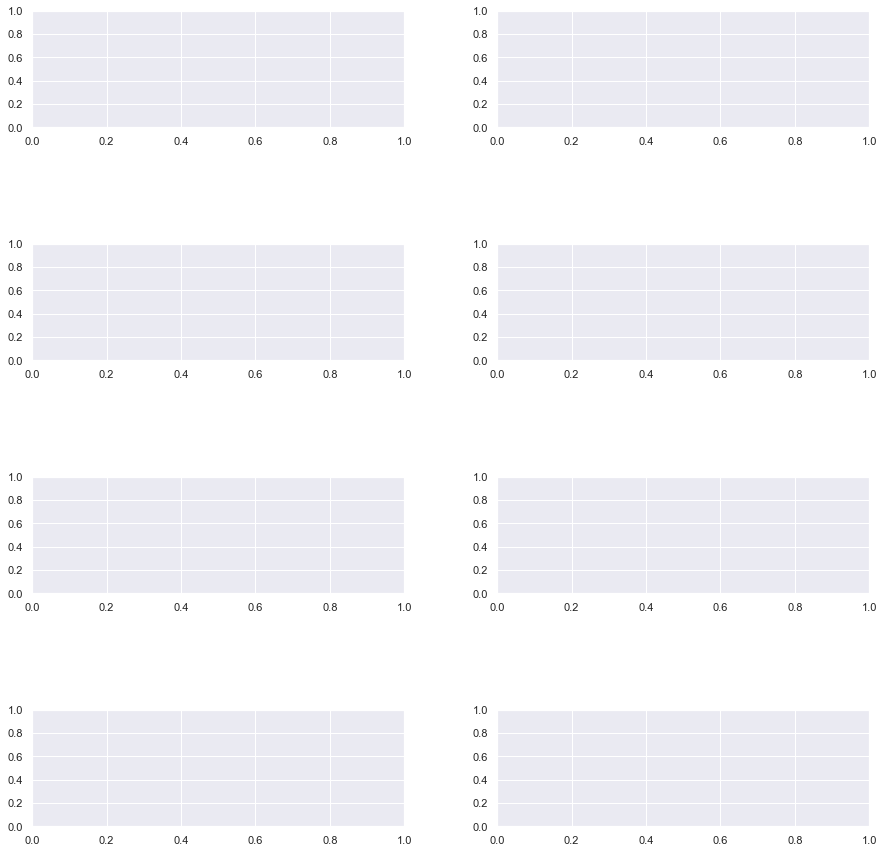

In [44]:
fig3 = plt.figure(figsize=(15,15)) #figure size in inches to fit A4

# parition the figure into 4 subplots with 'gridspec'
gs3 = gridspec.GridSpec(4, 2, # we want 4 rows, 2 cols
                       figure=fig3, # this gs applies to figure
                       hspace=1, 
                       wspace=0.25, # separation between plots
                       width_ratios=[1, 1], # ration between the first and second column
                       height_ratios=[1, 1, 1, 1]) #ration between the first ans second row

# add plots
az0 = fig3.add_subplot(gs3[0, 0]) # this will occupy the first row-first column
az1 = fig3.add_subplot(gs3[0, 1]) # and so on and so forth...
az2 = fig3.add_subplot(gs3[1, 0])
az3 = fig3.add_subplot(gs3[1, 1])
az4 = fig3.add_subplot(gs3[2, 0]) 
az5 = fig3.add_subplot(gs3[2, 1]) 
az6 = fig3.add_subplot(gs3[3, 0])
az7 = fig3.add_subplot(gs3[3, 1])

In [45]:
sns.countplot(data = df_private, x = 'Bedrooms', ax=az0)
sns.countplot(data = df_private, x = 'Tenure', ax=az1)
az1.set_xticklabels(az1.get_xticklabels(),rotation=90)
sns.countplot(data = df_private, x = 'property_group', ax=az2)
sns.countplot(data = df_private, x = 'property_type', ax=az3)
az3.set_xticklabels(az3.get_xticklabels(),rotation=90)
sns.countplot(data = df_private, x = 'Balcony', ax=az4)
sns.countplot(data = df_private, x = 'Garden', ax=az5)
sns.countplot(data = df_private, x = 'Penthouse', ax=az6)
sns.countplot(data = df_private, x = 'Parking', ax=az7)


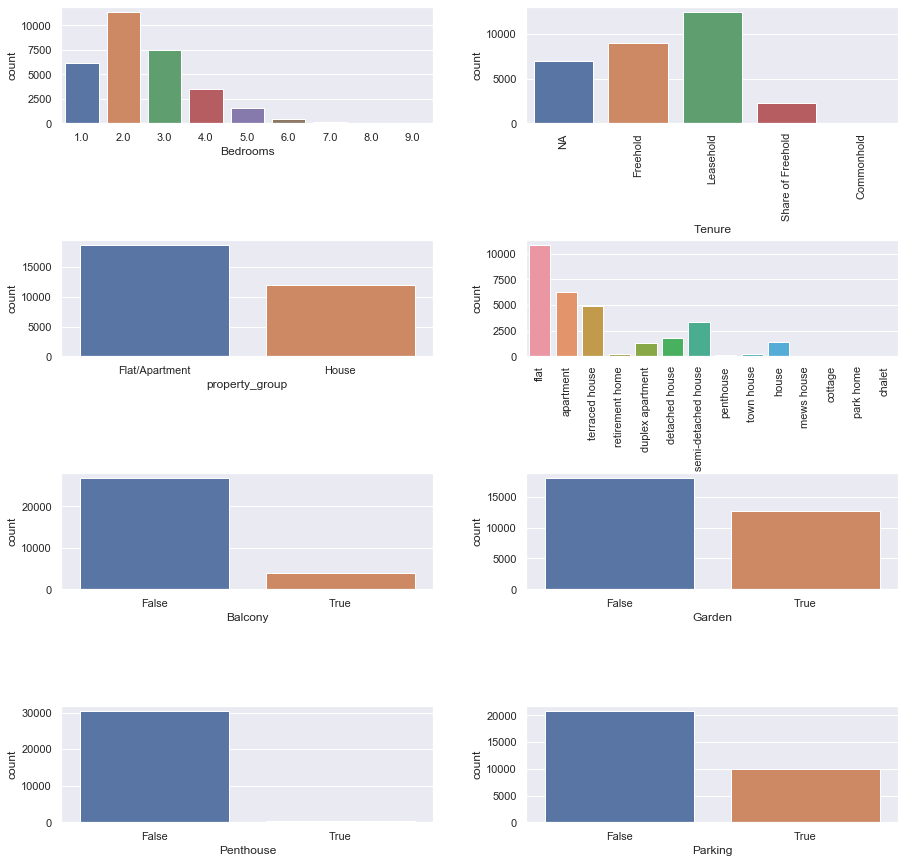

In [46]:
fig3

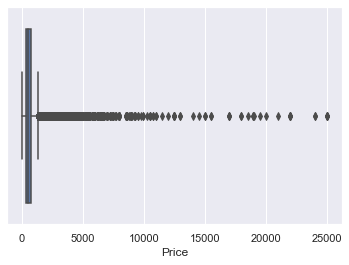

In [47]:
sns.boxplot(x=df_private['Price'])

In [48]:
Q1 = df_private.quantile(0.25)
Q3 = df_private.quantile(0.75)
IQR = Q3 - Q1
df_nooutliers = df_private[~((df_private < (Q1-1.5 * IQR)) |(df_private > (Q3 + 1.5 * IQR))).any(axis=1)]
df_nooutliers.shape

(22818, 15)

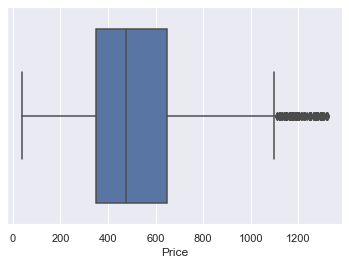

In [49]:
sns.boxplot(x=df_nooutliers['Price'])

,Bedrooms,Penthouse,Parking,Garden,Balcony,Price
Bedrooms,1.000000,-0.000836,0.081172,0.205204,-0.171660,0.393806
Penthouse,-0.000836,1.000000,0.035985,-0.049144,0.020995,0.076524
Parking,0.081172,0.035985,1.000000,0.123175,0.014126,-0.020948
Garden,0.205204,-0.049144,0.123175,1.000000,-0.142409,0.018643
Balcony,-0.171660,0.020995,0.014126,-0.142409,1.000000,-0.031542
Price,0.393806,0.076524,-0.020948,0.018643,-0.031542,1.000000


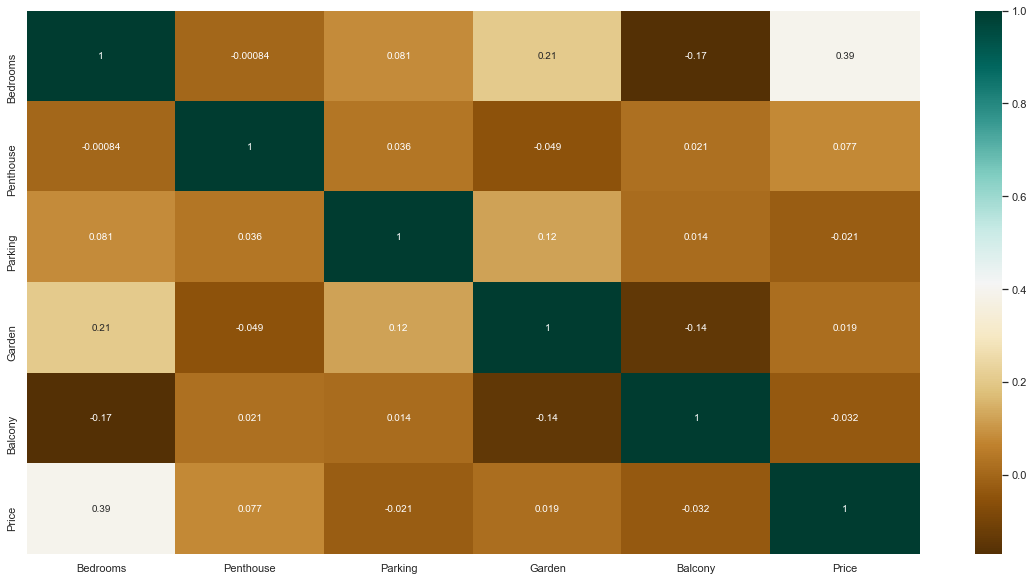

In [50]:
plt.figure(figsize=(20,10))
c= df_private.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

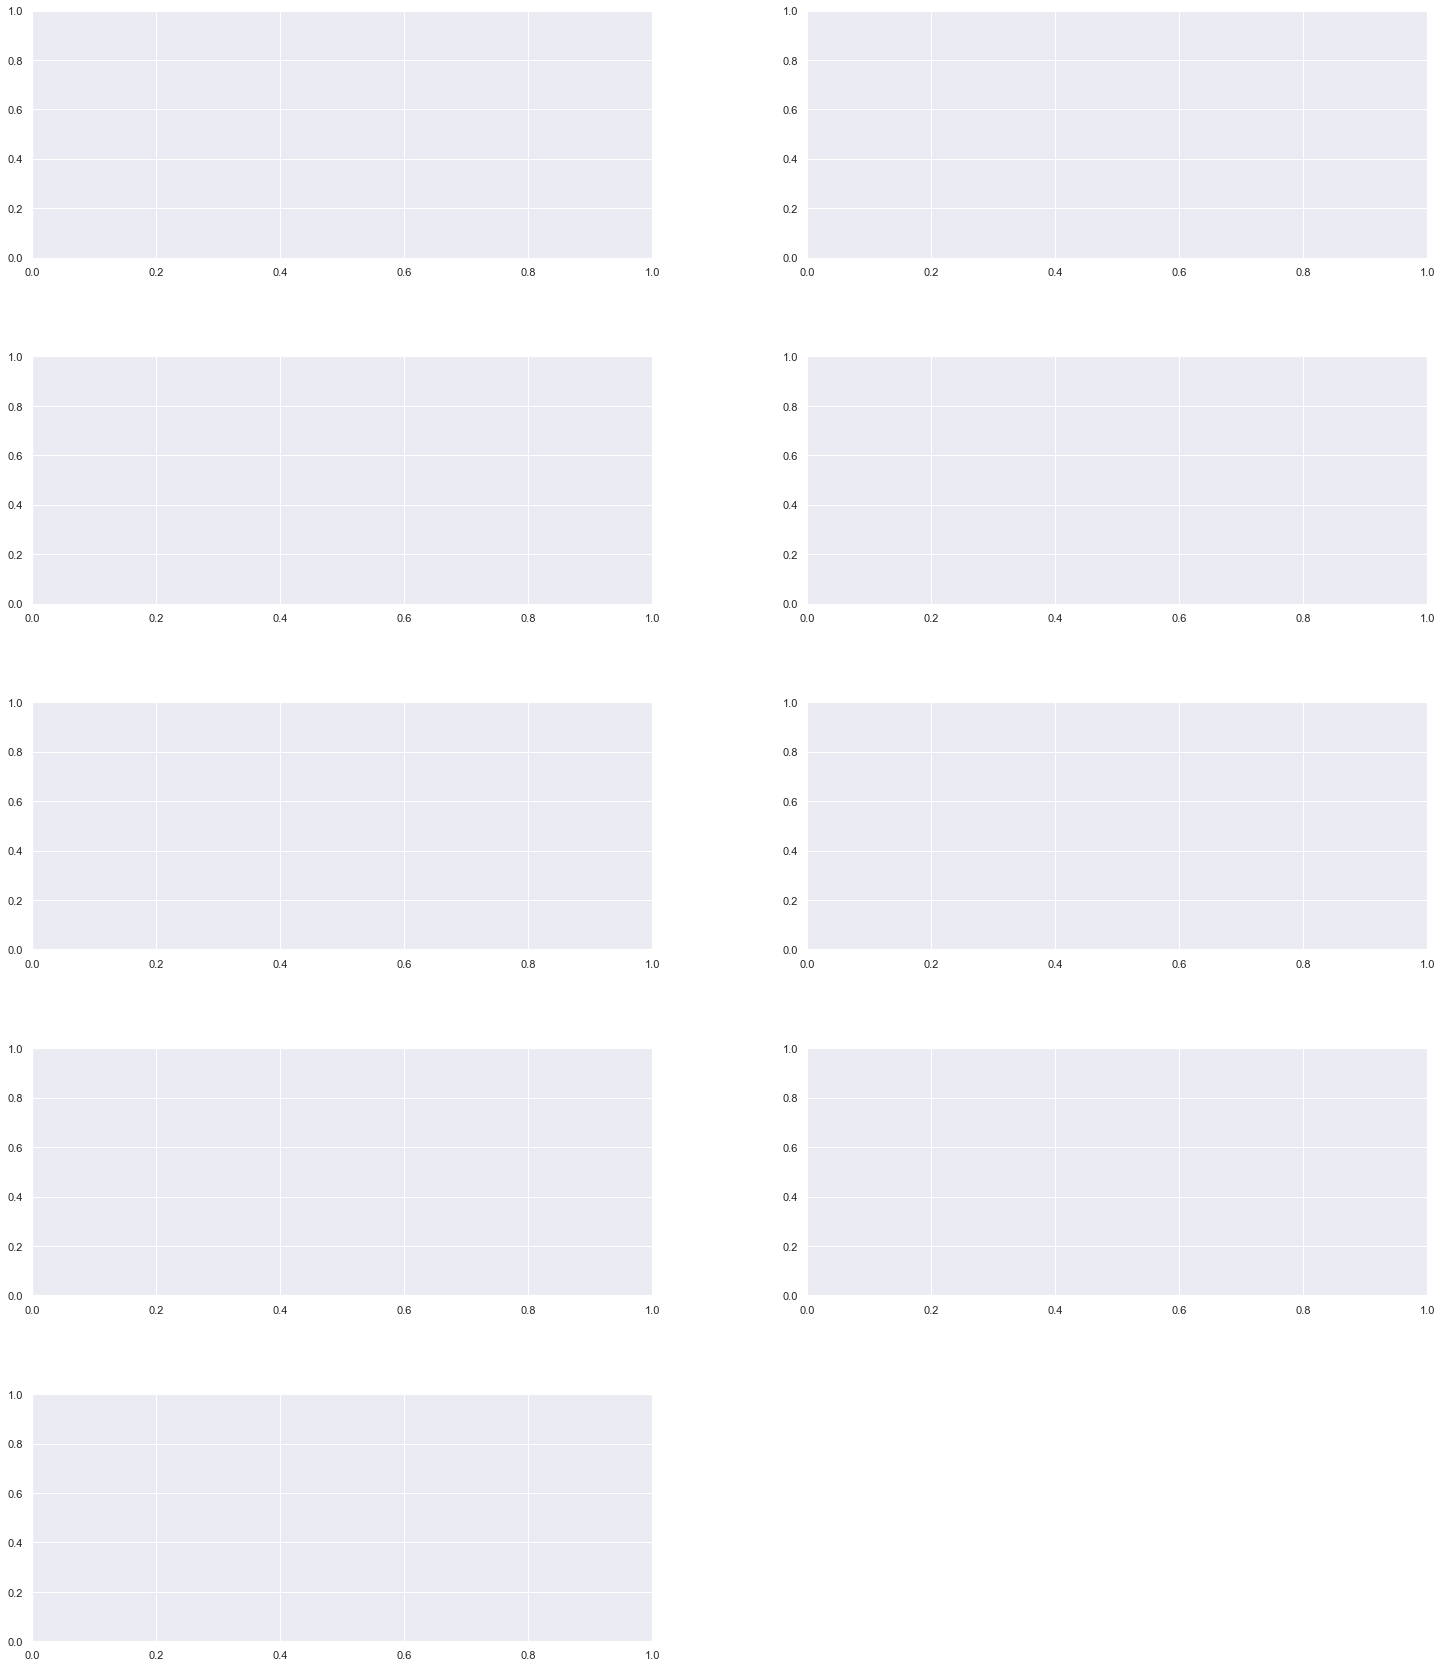

In [51]:
fig2 = plt.figure(figsize=(25,30)) #figure size in inches to fit A4

# parition the figure into 4 subplots with 'gridspec'
gs2 = gridspec.GridSpec(5, 2, # we want 2 rows, 2 cols
                       figure=fig2, # this gs applies to figure
                       hspace=0.4, 
                       wspace=0.25, # separation between plots
                       width_ratios=[1, 1], # ration between the first and second column
                       height_ratios=[1, 1, 1, 1,1]) #ration between the first ans second row

# add plots
ay0 = fig2.add_subplot(gs2[0, 0]) # this will occupy the first row-first column
ay1 = fig2.add_subplot(gs2[0, 1]) # and so on and so forth...
ay2 = fig2.add_subplot(gs2[1, 0])
ay3 = fig2.add_subplot(gs2[1, 1])
ay4 = fig2.add_subplot(gs2[2, 0]) 
ay5 = fig2.add_subplot(gs2[2, 1]) 
ay6 = fig2.add_subplot(gs2[3, 0])
ay7 = fig2.add_subplot(gs2[3, 1])
ay8 = fig2.add_subplot(gs2[4, 0])

In [52]:
sns.heatmap(df_private_1bed.corr(),cmap="BrBG",annot=True, ax=ay0)
sns.heatmap(df_private_2bed.corr(),cmap="BrBG",annot=True, ax=ay1)
sns.heatmap(df_private_3bed.corr(),cmap="BrBG",annot=True, ax=ay2)
sns.heatmap(df_private_4bed.corr(),cmap="BrBG",annot=True, ax=ay3)
sns.heatmap(df_private_5bed.corr(),cmap="BrBG",annot=True, ax=ay4)
sns.heatmap(df_private_6bed.corr(),cmap="BrBG",annot=True, ax=ay5)
sns.heatmap(df_private_7bed.corr(),cmap="BrBG",annot=True, ax=ay6)
sns.heatmap(df_private_8bed.corr(),cmap="BrBG",annot=True, ax=ay7)
sns.heatmap(df_private_9bed.corr(),cmap="BrBG",annot=True, ax=ay8)

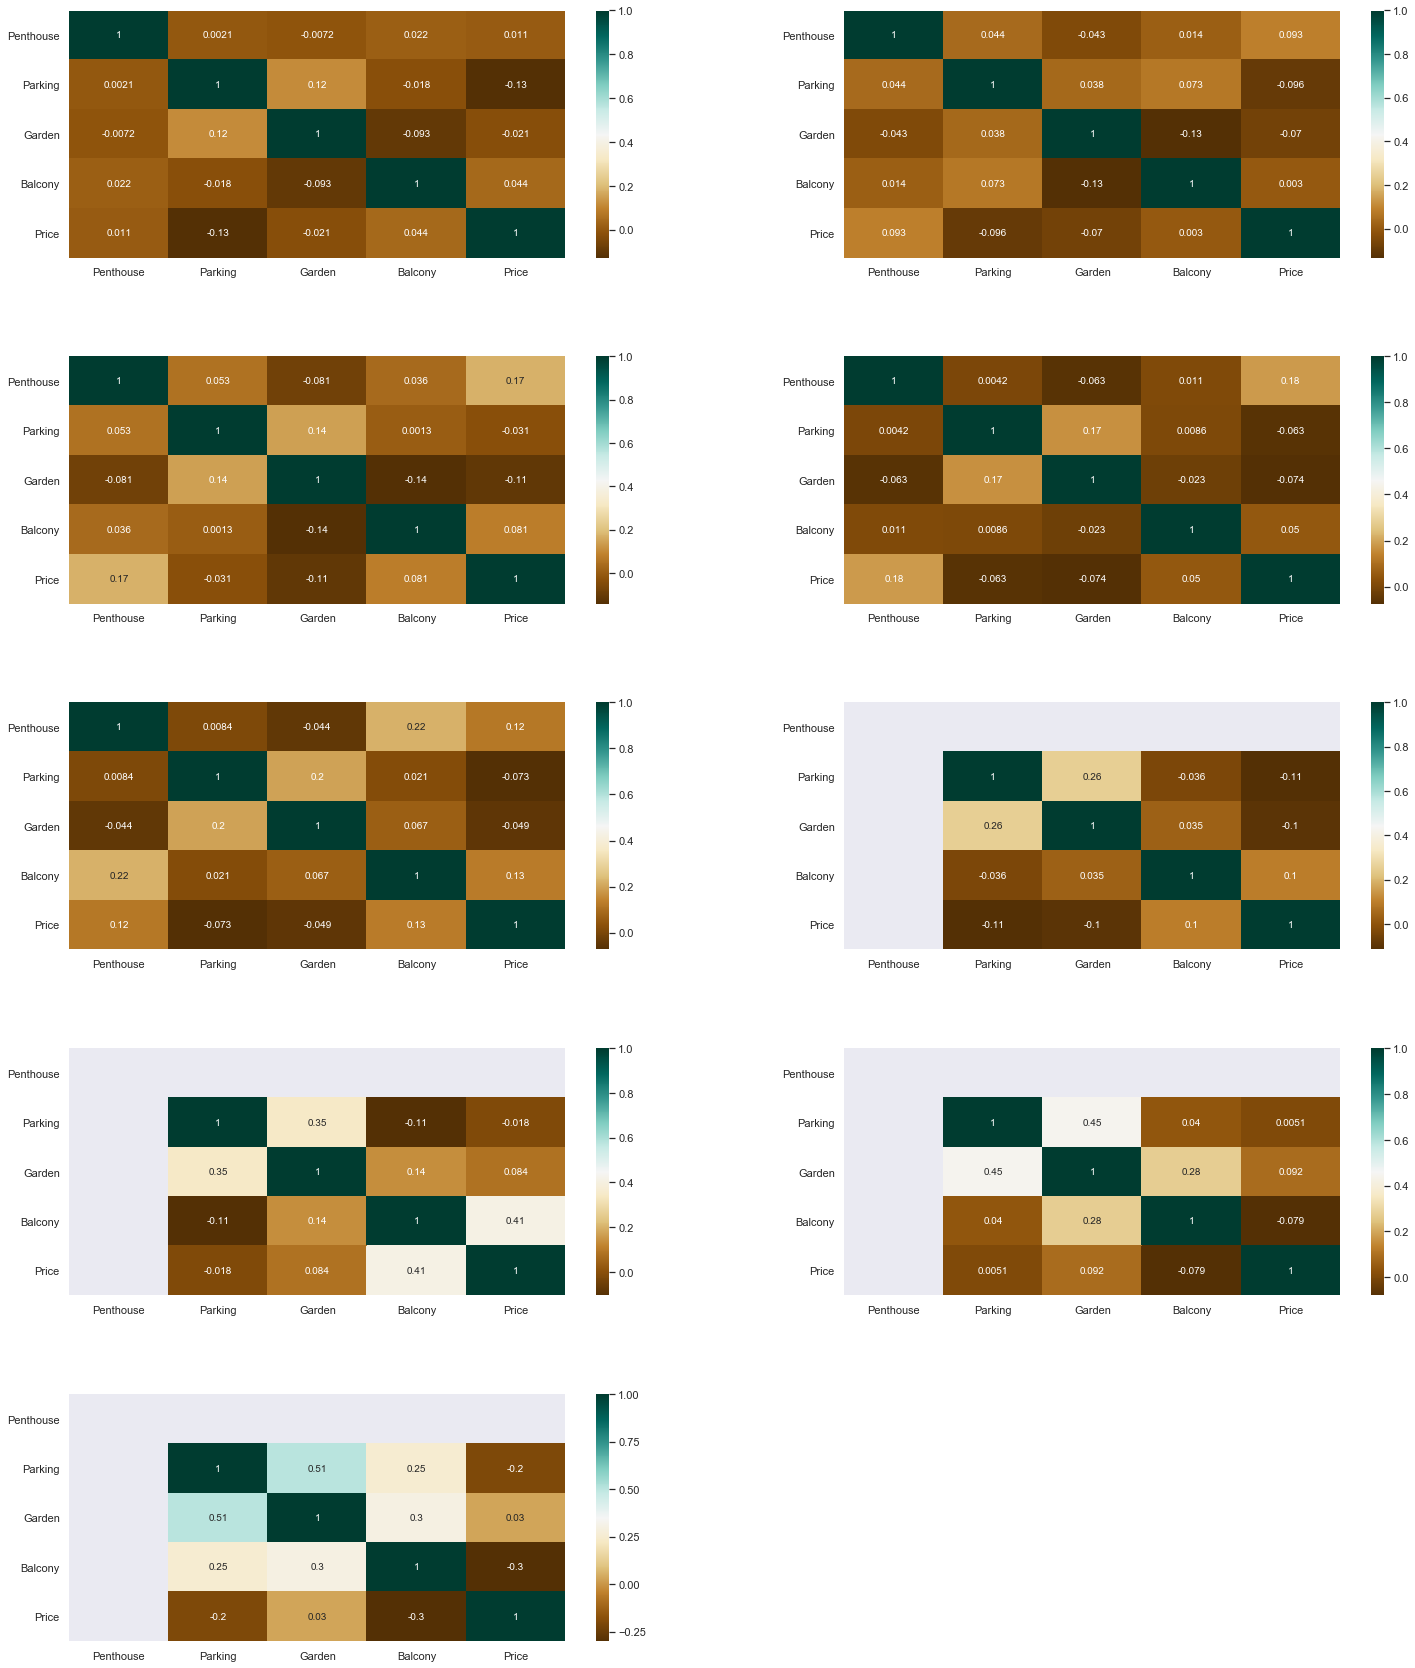

In [53]:
fig2

## Commercial Properties

In [54]:
df_commercial.describe()

,price
count,1051.000000
mean,1162.156124
std,5245.381831
min,0.001000
25%,100.000000
50%,500.000000
75%,1150.000000
max,160000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E47498780>]],
      dtype=object)

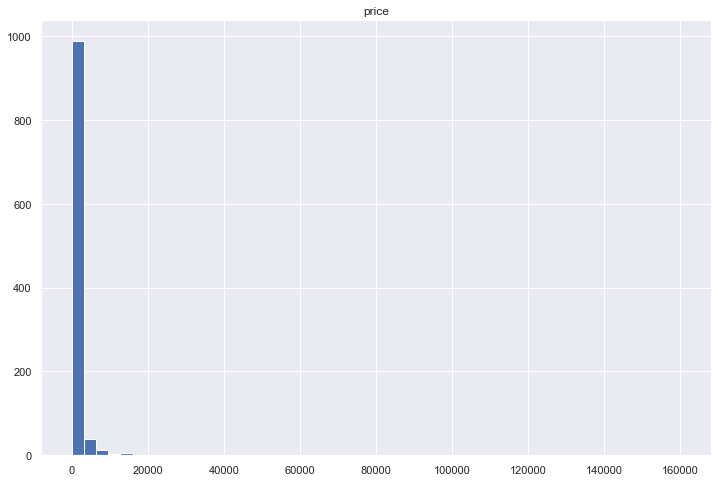

In [55]:
df_commercial.hist(figsize=(12,8), bins=50)

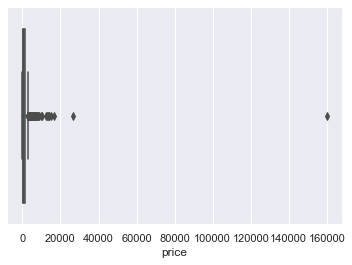

In [56]:
sns.boxplot(x=df_commercial['price'])

In [57]:
Q1_comm = df_commercial.quantile(0.25)
Q3_comm = df_commercial.quantile(0.75)
IQR_comm = Q3_comm - Q1_comm
df_comm_nooutliers = df_commercial[~((df_commercial < (Q1_comm-1.5 * IQR_comm)) |(df_commercial > (Q3_comm + 1.5 * IQR_comm))).any(axis=1)]
df_comm_nooutliers.shape

(1153, 8)

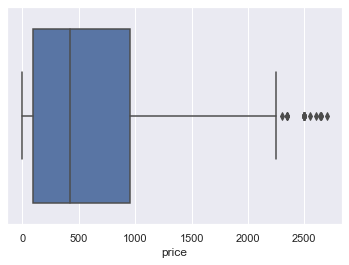

In [58]:
sns.boxplot(x=df_comm_nooutliers['price'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E4762B2E8>]],
      dtype=object)

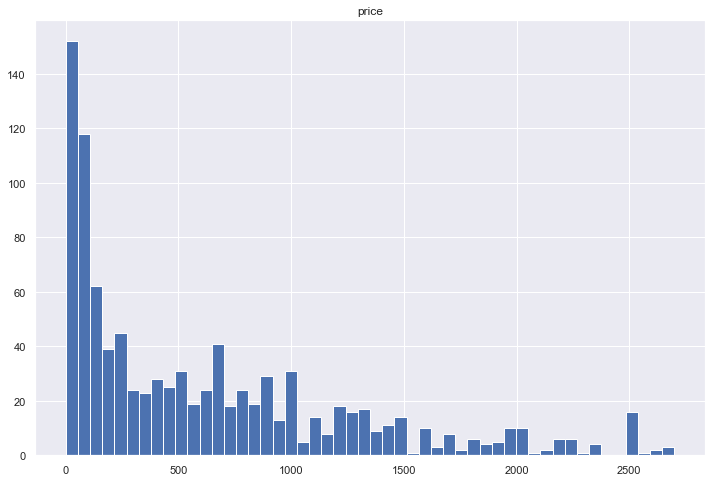

In [59]:
df_comm_nooutliers.hist(figsize=(12,8), bins=50)